# Solenoid Modeling

We can create solenoid fieldmesh data using an ideal model described in:

Derby, N., & Olbert, S. (2010). Cylindrical magnets and ideal solenoids.
American Journal of Physics, 78(3), 229–235. https://doi.org/10.1119/1.3256157

(preprint: https://arxiv.org/abs/0909.3880)


In [1]:
from pmd_beamphysics.fields.solenoid import make_solenoid_fieldmesh, fit_ideal_solenoid

from pmd_beamphysics.fields.analysis import solenoid_analysis

from pmd_beamphysics.fields.analysis import check_static_div_equation
from pmd_beamphysics.units import mu_0

from pmd_beamphysics import FieldMesh

import matplotlib.pyplot as plt
import numpy as np

In [2]:
FM = make_solenoid_fieldmesh(
    radius=0.05,
    L=0.2,
    rmax=0.1,
    zmin=-0.5,
    zmax=0.5,
    nr=51,
    nz=100,
    B0=1,
)

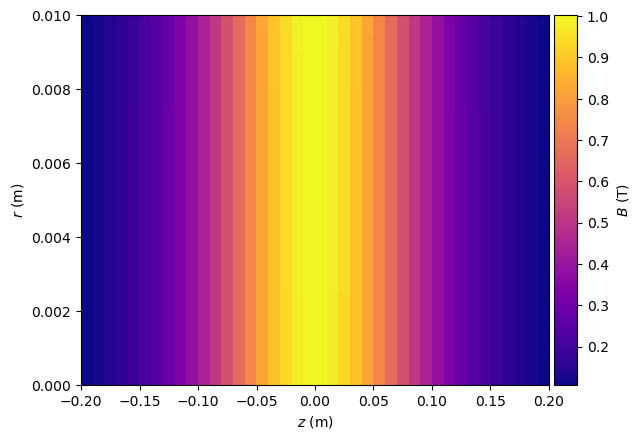

In [3]:
FM = make_solenoid_fieldmesh(L=0.1, B0=1, zmin=-0.2, zmax=0.2, rmax=0.01, radius=0.1)
FM.plot()

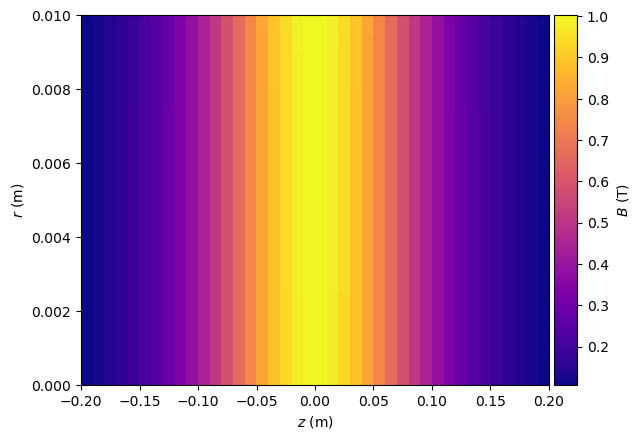

In [4]:
FM.plot()

In [5]:
FM.plot(stream=True, mirror="r")

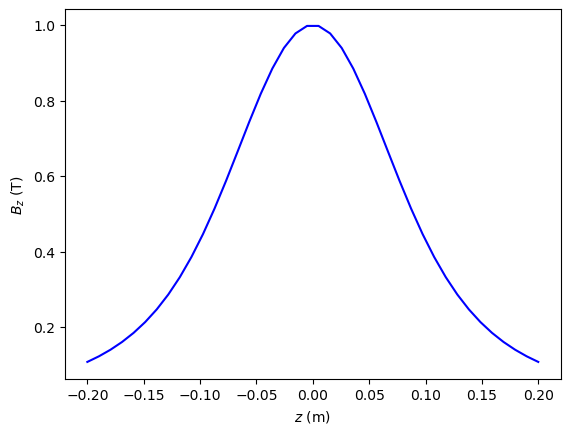

In [6]:
FM.plot_onaxis()

This calculates field integrals, and gives the equivalent hard-edge solenoid parameters:

In [7]:
z0, Bz0 = FM.axis_values("z", "Bz")
solenoid_analysis(z0, Bz0)

{'B0': np.float64(0.9974788851617891),
 'int_BL': np.float64(0.19894343802696227),
 'int_B2L': np.float64(0.13609559046233594),
 'L_hard': np.float64(0.2908139154217565),
 'B_hard': np.float64(0.6840918796421487)}

Check the static divergence Maxwell equation

In [8]:
check_static_div_equation(FM, rtol=1e-1, plot=True)

np.True_

## Hard edge

Making the radius very small approximates a hard-edge model.

Here we expext that $B_z = \mu_0 n I$

In [9]:
FM_hard = make_solenoid_fieldmesh(
    radius=1e-9,
    L=0.2,
    rmax=0.1,
    zmin=-0.4,
    zmax=0.4,
    nr=101,
    nz=200,
    nI=1,
)

In [10]:
# Ckech the on-avis maximum field is mu_0

FM_hard.Bz[0, 0, :].max() == mu_0

np.True_

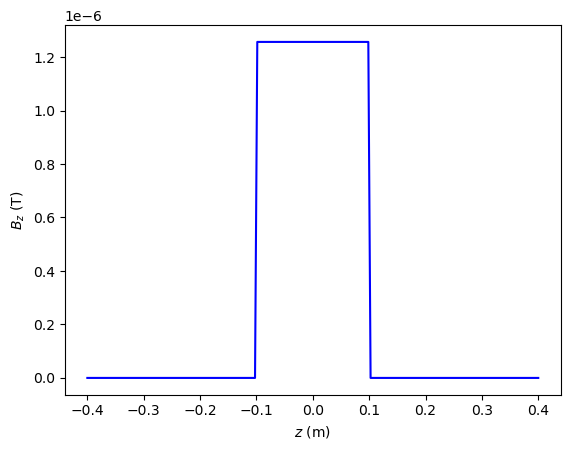

In [11]:
FM_hard.plot_onaxis()

Check hard-edge analysis again

In [12]:
z0, Bz0 = FM_hard.axis_values("z", "Bz")
solenoid_analysis(z0, Bz0)

{'B0': np.float64(1.25663706127e-06),
 'int_BL': np.float64(2.525903640743712e-07),
 'int_B2L': np.float64(3.1741441281553495e-13),
 'L_hard': np.float64(0.20100502512562904),
 'B_hard': np.float64(1.256637061269991e-06)}

## Compare with a real solenoid

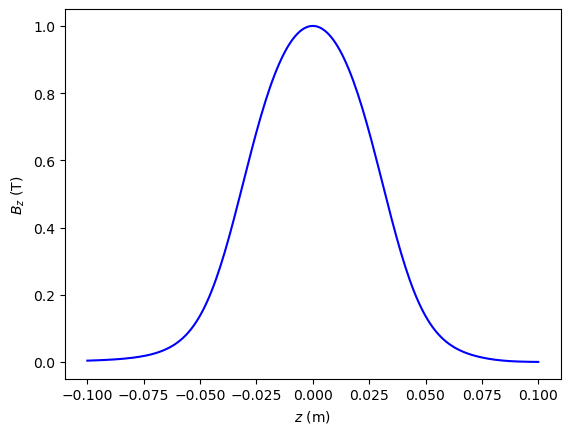

In [13]:
FM2 = FieldMesh("../data/solenoid.h5")
FM2.plot_onaxis()

In [14]:
z0, Bz0 = FM2.axis_values("z", "Bz")

fit = fit_ideal_solenoid(z0, Bz0)
fit

{'B0': np.float64(1.0),
 'radius': 0.019104535909029125,
 'L': 0.058730560178559606}

In [15]:
FM3 = make_solenoid_fieldmesh(
    radius=fit["radius"],
    L=fit["L"],
    rmax=0.1,
    zmin=-0.1,
    zmax=0.1,
    nr=100,
    nz=40,
    B0=fit["B0"],
)

Text(0, 0.5, '$B_z$ (T)')

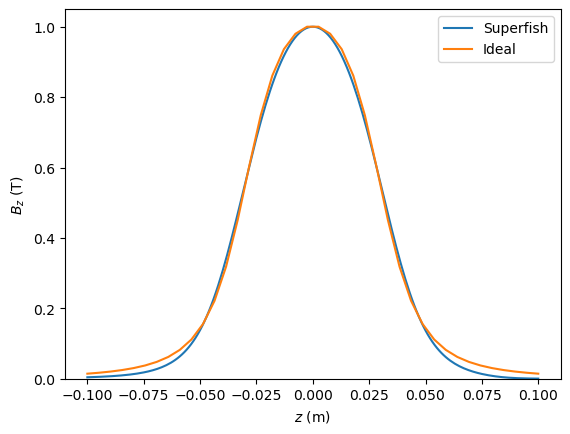

In [16]:
fig, ax = plt.subplots()
z0, Bz0 = FM2.axis_values("z", "Bz")
Bz0 = np.real(Bz0 / Bz0.max())
ax.plot(z0, Bz0, label="Superfish")

z, Bz = FM3.axis_values("z", "Bz")
Bz = np.real(Bz / Bz.max())
ax.plot(z, Bz, label="Ideal")
plt.legend()
ax.set_ylim(0, None)
ax.set_xlabel(r"$z$ (m)")
ax.set_ylabel(r"$B_z$ (T)")

Note that the fields are very different off-axis:

In [17]:
FM2.plot()
FM3.plot()

# Stylized Plot

Here we make a stylized plot, similar to the figure Fig. 1 in Derby & Olbert (2010).

In [18]:
FM = make_solenoid_fieldmesh(
    radius=0.05,
    L=0.2,
    rmax=0.5,
    zmin=-0.5,
    zmax=0.5,
    nr=200,
    nz=200,
    B0=1,
)

/home/runner/miniconda3/envs/beamphysics-dev/lib/python3.13/site-packages/matplotlib/patches.py:3436: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


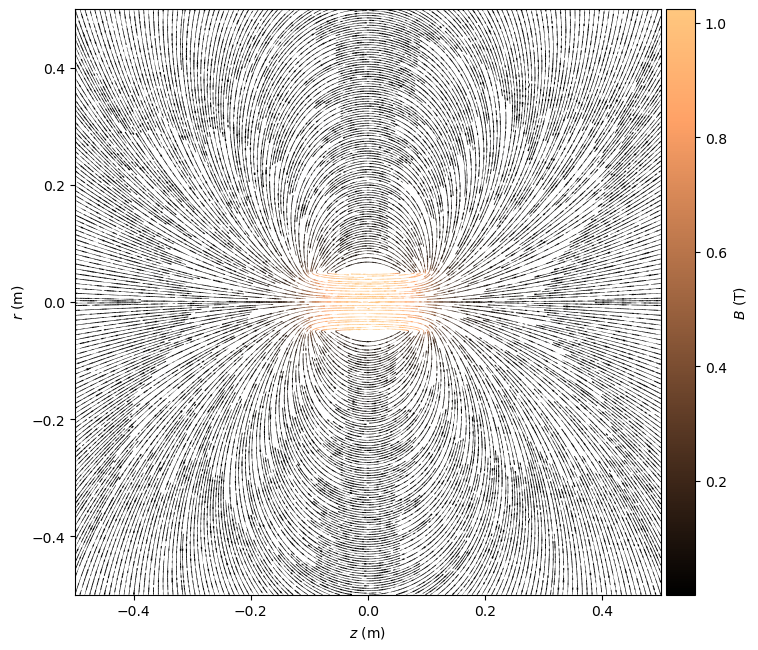

In [19]:
# Stylize with varying line thickness
linewidth = 0.5 + np.random.normal(scale=0.3, size=(2 * FM.shape[0] - 1, FM.shape[2]))

FM.plot(
    stream=True,
    mirror="r",
    density=8,
    linewidth=linewidth,
    arrowsize=0,
    figsize=(8, 8),
    aspect="equal",
    cmap="copper",
)